# Preprocessing Soil Data

In [ ]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent.parent))

from config import raw_files, processed_files

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xarray as xr

: 

: 

## Loading the Data

In [ ]:
filepath = processed_files["soil_nc"]

ds = xr.open_dataset(filepath)

print(ds)


<xarray.Dataset> Size: 953MB
Dimensions:        (y: 2233, x: 2480)
Coordinates:
  * x              (x) float64 20kB -8.675 -8.667 -8.658 ... 11.97 11.98 11.99
  * y              (y) float64 18kB 18.96 18.97 18.98 ... 37.55 37.56 37.57
Data variables: (12/22)
    COARSE         (y, x) float64 44MB ...
    SAND           (y, x) float64 44MB ...
    SILT           (y, x) float64 44MB ...
    CLAY           (y, x) float64 44MB ...
    BULK           (y, x) float64 44MB ...
    REF_BULK       (y, x) float64 44MB ...
    ...             ...
    ESP            (y, x) float64 44MB ...
    TCARBON_EQ     (y, x) float64 44MB ...
    GYPSUM         (y, x) float64 44MB ...
    ELEC_COND      (y, x) float64 44MB ...
    TEXTURE_USDA   (y, x) float64 44MB ...
    TEXTURE_SOTER  (y, x) <U1 22MB ...
Attributes:
    crs:          | 0.01, 0.00,-8.67|\n| 0.00,-0.01, 37.57|\n| 0.00, 0.00, 1.00|
    description:  Rasterized HWSD attributes (only raster-covered pixels)


: 

: 

In [ ]:
df = ds.to_dataframe().reset_index()
df

,y,x,COARSE,SAND,SILT,CLAY,BULK,REF_BULK,ORG_CARBON,PH_WATER,...,CEC_EFF,TEB,BSAT,ALUM_SAT,ESP,TCARBON_EQ,GYPSUM,ELEC_COND,TEXTURE_USDA,TEXTURE_SOTER
0,18.958333,-8.675000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
1,18.958333,-8.666663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
2,18.958333,-8.658327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
3,18.958333,-8.649990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
4,18.958333,-8.641653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5537835,37.566667,11.958320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
5537836,37.566667,11.966657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
5537837,37.566667,11.974993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
5537838,37.566667,11.983330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


: 

: 

In [ ]:
ds.close()

: 

: 

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5537840 entries, 0 to 5537839
Data columns (total 24 columns):
 #   Column         Dtype  
---  ------         -----  
 0   y              float64
 1   x              float64
 2   COARSE         float64
 3   SAND           float64
 4   SILT           float64
 5   CLAY           float64
 6   BULK           float64
 7   REF_BULK       float64
 8   ORG_CARBON     float64
 9   PH_WATER       float64
 10  TOTAL_N        float64
 11  CN_RATIO       float64
 12  CEC_SOIL       float64
 13  CEC_CLAY       float64
 14  CEC_EFF        float64
 15  TEB            float64
 16  BSAT           float64
 17  ALUM_SAT       float64
 18  ESP            float64
 19  TCARBON_EQ     float64
 20  GYPSUM         float64
 21  ELEC_COND      float64
 22  TEXTURE_USDA   float64
 23  TEXTURE_SOTER  object 
dtypes: float64(23), object(1)
memory usage: 1014.0+ MB


: 

: 

In [ ]:
df.isna().sum() / df.shape[0]

y                0.000000
x                0.000000
COARSE           0.407732
SAND             0.407732
SILT             0.407732
CLAY             0.407732
BULK             0.407732
REF_BULK         0.649713
ORG_CARBON       0.407732
PH_WATER         0.407732
TOTAL_N          0.407732
CN_RATIO         0.407732
CEC_SOIL         0.407732
CEC_CLAY         0.407732
CEC_EFF          0.407732
TEB              0.407732
BSAT             0.407732
ALUM_SAT         0.407732
ESP              0.407732
TCARBON_EQ       0.407732
GYPSUM           0.407732
ELEC_COND        0.407732
TEXTURE_USDA     0.545908
TEXTURE_SOTER    0.000000
dtype: float64

: 

: 

## Imputing Missing Values

<Axes: xlabel='x', ylabel='y'>

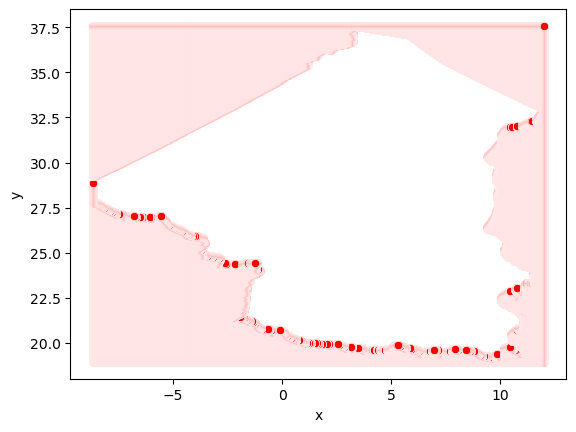

: 

: 

In [ ]:
sns.scatterplot(df[df['COARSE'].isna()], x='x', y='y', color='r')

In [ ]:
df = df[~df['COARSE'].isna()]
df.head()

,y,x,COARSE,SAND,SILT,CLAY,BULK,REF_BULK,ORG_CARBON,PH_WATER,...,CEC_EFF,TEB,BSAT,ALUM_SAT,ESP,TCARBON_EQ,GYPSUM,ELEC_COND,TEXTURE_USDA,TEXTURE_SOTER
9554,18.983345,8.948773,6.6,54.6,22.2,23.2,1.386,1.620,1.4092,5.94,...,10.2,11.4,79.6,2.4,1.4,0.0,1.0,0.6,12.0,C
12030,18.991682,8.915426,10.4,35.5,44.6,19.9,1.467,1.702,1.9662,5.45,...,8.4,7.1,52.4,22.5,1.6,0.0,0.1,0.0,9.0,M
12031,18.991682,8.923763,10.4,35.5,44.6,19.9,1.467,1.702,1.9662,5.45,...,8.4,7.1,52.4,22.5,1.6,0.0,0.1,0.0,9.0,M
12032,18.991682,8.932100,10.4,35.5,44.6,19.9,1.467,1.702,1.9662,5.45,...,8.4,7.1,52.4,22.5,1.6,0.0,0.1,0.0,9.0,M
12033,18.991682,8.940436,10.4,35.5,44.6,19.9,1.467,1.702,1.9662,5.45,...,8.4,7.1,52.4,22.5,1.6,0.0,0.1,0.0,9.0,M


: 

: 

In [ ]:
df.isna().sum() / df.shape[0]

y                0.000000
x                0.000000
COARSE           0.000000
SAND             0.000000
SILT             0.000000
CLAY             0.000000
BULK             0.000000
REF_BULK         0.408566
ORG_CARBON       0.000000
PH_WATER         0.000000
TOTAL_N          0.000000
CN_RATIO         0.000000
CEC_SOIL         0.000000
CEC_CLAY         0.000000
CEC_EFF          0.000000
TEB              0.000000
BSAT             0.000000
ALUM_SAT         0.000000
ESP              0.000000
TCARBON_EQ       0.000000
GYPSUM           0.000000
ELEC_COND        0.000000
TEXTURE_USDA     0.233300
TEXTURE_SOTER    0.000000
dtype: float64

: 

: 

In [11]:
df['longitude'] = df['x']
df['latitude'] = -df['y']


/tmp/ipykernel_31603/1797530838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['longitude'] = df['x']
/tmp/ipykernel_31603/1797530838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['latitude'] = -df['y']


<Axes: xlabel='longitude', ylabel='latitude'>

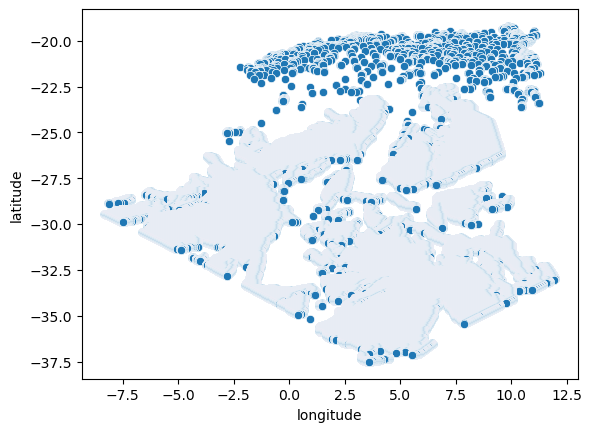

In [12]:
sns.scatterplot(df[df['REF_BULK'].isna()], x='longitude', y='latitude')

In [13]:
from geopy.distance import geodesic

In [14]:
df_missing = df[df['REF_BULK'].isna()].copy()
df_known   = df[df['REF_BULK'].notna()].copy()

In [15]:
def find_nearest_value(lat, lon, known_points):
    # Compute geodesic distance to each known point
    distances = known_points.apply(
        lambda row: geodesic((lat, lon), (row['latitude'], row['longitude'])).meters,
        axis=1
    )
    # Get index of nearest point
    nearest_idx = distances.idxmin()
    return known_points.loc[nearest_idx, 'REF_BULK']

In [16]:
df_missing['REF_BULK'] = df_missing.apply(
    lambda row: find_nearest_value(row['latitude'], row['longitude'], df_known),
    axis=1
)
df_imputed = pd.concat([df_known, df_missing]).sort_index()

KeyboardInterrupt: 

In [ ]:
df_imputed.info()

### `TEXTURE_USDA`

<Axes: xlabel='longitude', ylabel='latitude'>

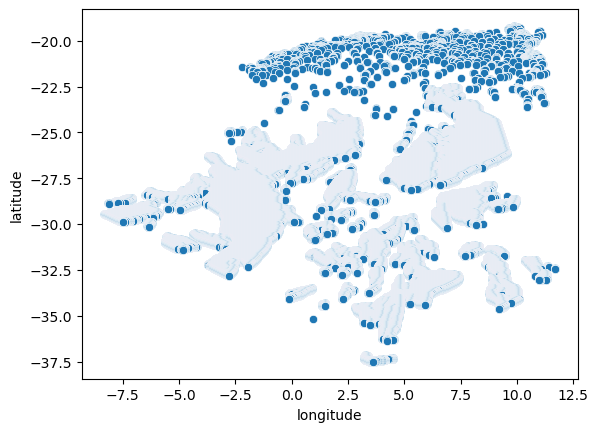

In [18]:
sns.scatterplot(df[df['TEXTURE_USDA'].isna()], x='longitude', y='latitude')

take a square surrounding each null point and only apply imputation on values inside that square